# Project Name: Heart Disease Predictor

### Goal: To predict if one is prone to developing CHD within the next decade.

**Dataset** = Geeks for Geeks cardiovascular study dataset ( https://media.geeksforgeeks.org/wp-content/uploads/20240307152534/framingham.csv )

**About the Project**: Heart Diseases are extremely common these days, and also may prove to be fatal when treated late. So, its important to detect a possibility of a heart disease developing in the future, so that we can take early steps by changing our lifestyle and also medications in necessary to avoid any worse scenario.
        
To facilitate this, we design a Machine Learning Model, which will be provided with data regarding various determmining factors, and will provise us with assistance in recognising a possibility of developing a Heart Disease in the future.

#### Section 1: Collecting the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r"C:\Users\goura\Desktop\Data Science\Datasets\Heart Disease.csv")
data.dropna(axis = 0, inplace = True)
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


### Section 2: Data Manipulation / Cleaning

In [2]:
columns = [ i for i in data.columns ]
features = columns [:-1]
label = columns [-1]

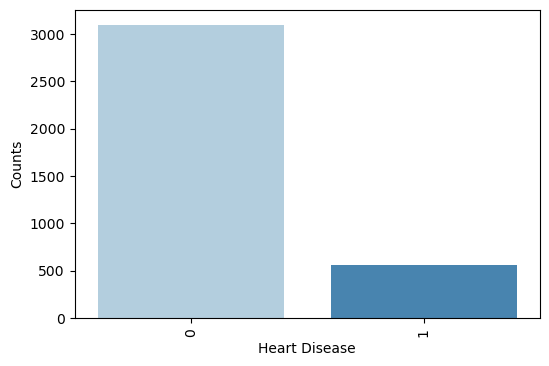

In [3]:
counts = data[label].value_counts()
temp_df = pd.DataFrame({
    "Heart Disease": counts.index,
    "Counts": counts.values})
palette = sns.color_palette("Blues", len(temp_df))
plt.figure(figsize=(6,4))
sns.barplot(x = "Heart Disease", y = "Counts", data = temp_df,palette=palette)
plt.xticks(rotation=90)
plt.show()

In [4]:
data[label].value_counts()

TenYearCHD
0    3101
1     557
Name: count, dtype: int64

We can see there's a disparity is the number of instances between the label values, with one value constituting over 80% of the instances.<br>
This may cause a bit of bias during our prediction, leading to incorrect predictions when the actual value should be 1.

We need to split the data into different parts, on the basis of
* Features, Label [ to distinguish the columns used to make predictions and the column to be predicted ]
* Train, Test [ to distinguish data we will train our model on and data we will test the trained model on ]

We will use the **Stratified Shuffle Split**, due to such splits being a representatinve of the entire dataset.

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(data, data[label]):
    train_set = data.iloc[train_index]
    test_set = data.iloc[test_index]

In [6]:
X_train = train_set[features]
X_test = test_set[features]
Y_train = train_set[label]
Y_test = test_set[label]
X = pd.concat([X_train,X_test])
Y = pd.concat([Y_train,Y_test])

In [7]:
X_train

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3492,1,38,1.0,1,30.0,0.0,0,0,0,281.0,111.0,72.5,27.22,95.0,80.0
990,1,39,2.0,0,0.0,0.0,0,0,0,247.0,113.0,80.0,28.59,80.0,82.0
3091,1,53,3.0,1,20.0,0.0,0,1,0,204.0,152.0,74.0,24.80,78.0,89.0
417,0,45,2.0,0,0.0,0.0,0,1,0,304.0,148.0,106.0,22.98,98.0,72.0
808,0,47,2.0,1,10.0,0.0,0,0,0,191.0,125.0,72.5,23.81,75.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,1,36,1.0,1,15.0,0.0,0,0,0,300.0,102.0,66.5,25.68,100.0,100.0
1953,1,46,1.0,0,0.0,0.0,0,0,0,222.0,120.5,73.5,27.23,77.0,60.0
607,0,54,1.0,0,0.0,0.0,0,1,0,287.0,145.0,91.0,23.81,68.0,83.0
2541,0,48,3.0,1,9.0,0.0,0,1,0,266.0,155.0,100.0,27.86,75.0,84.0


In [8]:
Y_train

3492    0
990     0
3091    0
417     0
808     0
       ..
2005    0
1953    0
607     0
2541    0
964     0
Name: TenYearCHD, Length: 2926, dtype: int64

Lets have a look at alll the created parts of the dataset. 
* X (all rows of feature columns),
* Y (all rows of label column),
* X_train (training rows of feature columns),
* X_test (testing rows of feature columns),
* Y_train (training rows of label column),
* Y_test (testing rows of label column)

### Section 3: Model Selection & Training

Now, we define both the set of models we will use as well as the error function.<br>
We will introduce 3 classification models in our project, to compare their performances and choose the best possible outcome.

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

The below function is to test the accuracy of predictions for any particular "True value".<br>
This is introduced due to suspicion of biased desicion making, as mentioned earlier.

In [10]:
def bayes(A,B,x,y):
    t=0
    c=0
    for a,b in zip(A,B):
        if b==y:
            t+=1
            if a==x:
                c+=1
    return float(c)/float(t)

In [11]:
def cv_scoring(estimator,X,Y):
    return accuracy_score(Y,estimator.predict(X))

In [12]:
models = {
    "SVC" : SVC(),
    "GaussNB" : GaussianNB(),
    "RFC" : RandomForestClassifier(random_state=18)
}

In [13]:
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model,X,Y,cv=5, scoring = cv_scoring)
    print("=="*30) 
    print(model_name) 
    print(f"Scores: {scores}") 
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [0.84836066 0.84699454 0.84699454 0.84815321 0.84678523]
Mean Score: 0.8474576334536865
GaussNB
Scores: [0.81967213 0.82923497 0.82923497 0.81532148 0.82079343]
Mean Score: 0.8228513975166887
RFC
Scores: [0.84562842 0.83743169 0.84699454 0.85088919 0.84678523]
Mean Score: 0.8455458126826789


As we can see, all three models make reasonable & nearly equally accurate predictions.<br>
But, can we dive deeper into these predictions?<br>

It is a important task to make good predictions in the medical field, because a person's life may depend on what just seems a number to us.

Lets test the accuracy of each model, for when the actual values is known.

Accuracy on train data by SVM Classifier: 84.83%
Bayes on 1/1 by SVM Classifier:  0.672645739910314 %
Bayes on 0/0 by SVM Classifier:  99.95967741935485 %
Accuracy on test data by SVM Classifier: 84.70%
Bayes on 1/1 by SVM Classifier:  0.9009009009009009 %
Bayes on 0/0 by SVM Classifier:  99.6779388083736 %


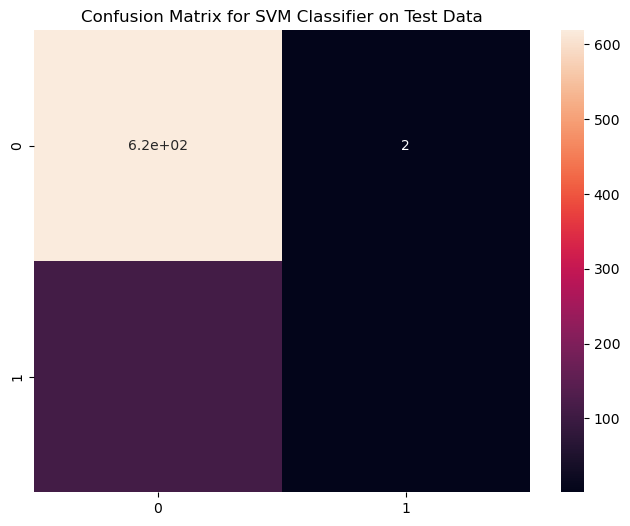

In [14]:
svm_model = SVC()
svm_model.fit(X_train,Y_train)
preds = svm_model.predict(X_test)

train_accuracy = accuracy_score(Y_train, svm_model.predict(X_train)) * 100
print(f"Accuracy on train data by SVM Classifier: {train_accuracy:.2f}%")
print("Bayes on 1/1 by SVM Classifier: ",bayes(svm_model.predict(X_train),Y_train,1,1)*100,"%")
print("Bayes on 0/0 by SVM Classifier: ",bayes(svm_model.predict(X_train),Y_train,0,0)*100,"%")

test_accuracy = accuracy_score(Y_test, preds) * 100
print(f"Accuracy on test data by SVM Classifier: {test_accuracy:.2f}%")
print("Bayes on 1/1 by SVM Classifier: ",bayes(svm_model.predict(X_test),Y_test,1,1)*100,"%")
print("Bayes on 0/0 by SVM Classifier: ",bayes(svm_model.predict(X_test),Y_test,0,0)*100,"%")

cf_matrix = confusion_matrix(Y_test, preds) 
plt.figure(figsize=(8,6))
plt.title("Confusion Matrix for SVM Classifier on Test Data") 
sns.heatmap(cf_matrix,annot=True)
plt.show()

As we noticed earlier, the accuracy is a decent 84%.<br>
But, there is one more detail that comes to notice, that is - <br>

The performance of the model is **extremely poor** when it comes to predicting someone prone to a heart disease.<br>
The accuracy being a extremely low **0.67%**

This detail is a concerning fault of our model, because failing to recognise a person's probable illness may lead to delays in treatment, which may prove to have **severe concequences**.

Lets check how the other models are performing in this regard.

Accuracy on train data by Random Forest Classifier: 100.00%
Bayes on 1/1 by RF Classifier:  100.0 %
Bayes on 0/0 by RF Classifier:  100.0 %
Accuracy on test data by Random Forest Classifier: 84.70%
Bayes on 1/1 by RF Classifier:  8.108108108108109 %
Bayes on 0/0 by RF Classifier:  98.38969404186795 %


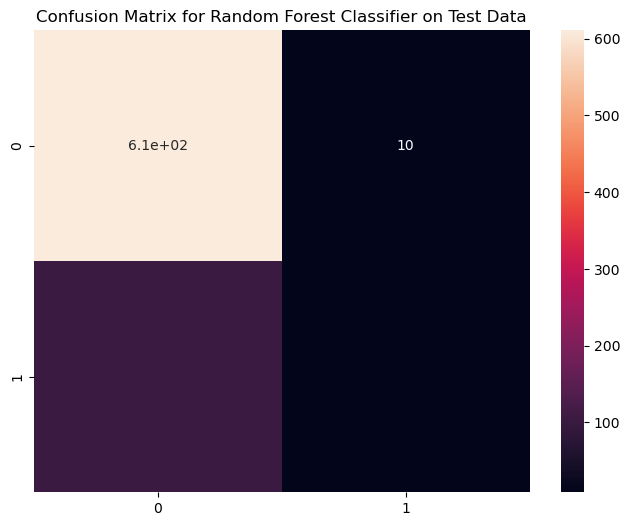

In [15]:
rf_model = RandomForestClassifier(random_state=18) 
rf_model.fit(X_train, Y_train) 
preds = rf_model.predict(X_test) 

train_accuracy = accuracy_score(Y_train, rf_model.predict(X_train)) * 100
print(f"Accuracy on train data by Random Forest Classifier: {train_accuracy:.2f}%")
print("Bayes on 1/1 by RF Classifier: ",bayes(rf_model.predict(X_train),Y_train,1,1)*100,"%")
print("Bayes on 0/0 by RF Classifier: ",bayes(rf_model.predict(X_train),Y_train,0,0)*100,"%")
  
test_accuracy = accuracy_score(Y_test, rf_model.predict(X_test)) * 100
print(f"Accuracy on test data by Random Forest Classifier: {test_accuracy:.2f}%")
print("Bayes on 1/1 by RF Classifier: ",bayes(rf_model.predict(X_test),Y_test,1,1)*100,"%")
print("Bayes on 0/0 by RF Classifier: ",bayes(rf_model.predict(X_test),Y_test,0,0)*100,"%")

cf_matrix = confusion_matrix(Y_test, preds) 
plt.figure(figsize=(8,6))
plt.title("Confusion Matrix for Random Forest Classifier on Test Data") 
sns.heatmap(cf_matrix,annot=True)
plt.show()

While the results of the RFC model is much better for detecting illnesses, while maintaining a similar overall and healthy person predicting capability,
the accuracy is still far too low than what is desired.<br>
Lets have a look at our last model.

Accuracy on train data by GaussianNB Classifier: 82.37%
Bayes on 1/1 by GaaussNB Classifier:  23.094170403587444 %
Bayes on 0/0 by GaaussNB Classifier:  93.0241935483871 %
Accuracy on test data by GaussianNB Classifier: 82.10%
Bayes on 1/1 by GaaussNB Classifier:  22.52252252252252 %
Bayes on 0/0 by GaaussNB Classifier:  92.7536231884058 %


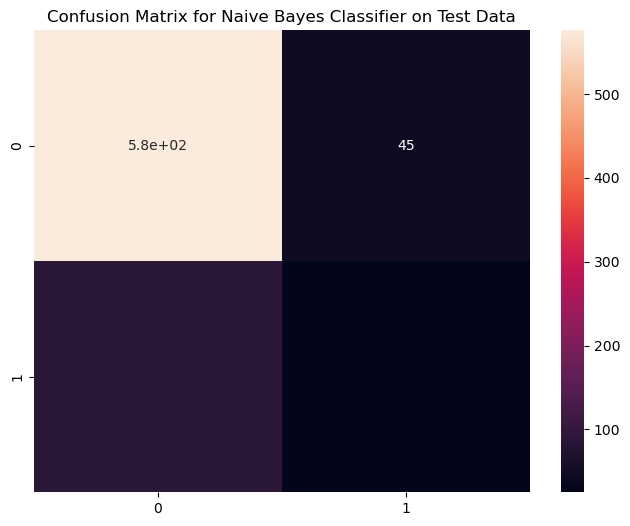

In [16]:
nb_model = GaussianNB()
nb_model.fit(X_train,Y_train)
preds = nb_model.predict(X_test)

train_accuracy = accuracy_score(Y_train, nb_model.predict(X_train))*100
print(f"Accuracy on train data by GaussianNB Classifier: {train_accuracy:.2f}%")
print("Bayes on 1/1 by GaaussNB Classifier: ",bayes(nb_model.predict(X_train),Y_train,1,1)*100,"%")
print("Bayes on 0/0 by GaaussNB Classifier: ",bayes(nb_model.predict(X_train),Y_train,0,0)*100,"%")

test_accuracy = accuracy_score(Y_test, nb_model.predict(X_test)) * 100
print(f"Accuracy on test data by GaussianNB Classifier: {test_accuracy:.2f}%")
print("Bayes on 1/1 by GaaussNB Classifier: ",bayes(nb_model.predict(X_test),Y_test,1,1)*100,"%")
print("Bayes on 0/0 by GaaussNB Classifier: ",bayes(nb_model.predict(X_test),Y_test,0,0)*100,"%")

cf_matrix = confusion_matrix(Y_test, preds) 
plt.figure(figsize=(8,6))
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data") 
sns.heatmap(cf_matrix,annot=True)
plt.show()

While the results of the GaussianNB model is much better than RFC model for detecting illnesses, it has a significant drop in accuracy of detecting healthy people, and the accuracy is still far too low than what is desired.

### Section 4: Prediction Combination / Finalization

We have yet acheived the highest accuracy of 22% for detecting people with potential heart diseases in the future.<br>

One way to improve this percentage would be the combine the predictions of all 3 models, and considering the overall prediction to be 1,<br> if atleast one or more predictions is 1.

Why? because the chance of all three predictions being 0, when the actual value is 1,<br> would be between
**22% and 30%** <BR>

0.99  * 0.92  * 0.77 = { 0.3 } <BR>
{ [P(0|1) - svm] * [P(0|1) - rfc] * [P(0|1) - gnb] }

The percentage would've been 30% if all three predicions were iid, but they are not. So the percentage is less than 30%, but more than 22%<br>
Lets have a look at the results we get.

In [17]:
nb_pred = nb_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
coll = [[i,j,k] for i,j,k in zip(nb_pred,rf_pred,svm_pred)]
final_pred = [max(i) for i in coll]

In [18]:
test_accuracy = accuracy_score(Y_test, final_pred)
test_accuracy

0.8169398907103825

In [19]:
bayes(final_pred,Y_test,1,1)*100

25.225225225225223

In [20]:
bayes(final_pred,Y_test,0,0)*100

91.78743961352657

Our efforts have led the accuracy to rise from 22% to 25%.<br>
While any rise in accuracy would be effective in helping more people in need of immediate help, the accuracy still needs to be higher than what it is as of now.

We know, a Regression Model wont be making a 0 or 1 classification. But we can use Regression to help with some predictions.

Logic: The higher the value of the Regression Prediction, the more likely it is for the actual value to be equal to 1.<br>
So, we can set a threshold. If the predicted value is more than that value, the prediction would be considered to be 1, else it will be considered 0

Lets use **RandomForestRegressor** for this purpose

In [21]:
from sklearn.ensemble import RandomForestRegressor
rfg_model = RandomForestRegressor()
rfg_model.fit(X_train,Y_train)

RandomForestRegressor()

Lets try out our approach with the threshold to be 0.25

In [22]:
rfg_pred = rfg_model.predict(X_test)
rfg_pred = [ 1 if i>0.25 else 0 for i in rfg_pred ]

In [23]:
test_accuracy = accuracy_score(Y_test, rfg_pred)
test_accuracy*100

76.63934426229508

In [24]:
bayes(rfg_pred,Y_test,1,1)*100

49.549549549549546

In [25]:
bayes(rfg_pred,Y_test,0,0)*100

81.48148148148148

As we can see, the accuracy for this approach is much higher than the other 3 models, individually and combined.<br>
If we add the new predictions to the previous 3 prediction combination, the accuracy for detecting possible disease would reach a even higher accuracy.

In [26]:
abs_pred = [ max(i,j) for i,j in zip(final_pred, rfg_pred) ]

In [27]:
test_accuracy = accuracy_score(Y_test, abs_pred)
test_accuracy*100

75.27322404371584

In [28]:
bayes(abs_pred,Y_test,1,1)*100

52.25225225225225

In [29]:
bayes(abs_pred,Y_test,0,0)*100

79.38808373590982

##### Section 4.5: Accuracy Trade-off

It is observable that increasing the accuracy for detecting people with possibility of developing diseases ( *bayes 1/1* ) comes with a decrease in accuracy of clearning people with no diseases ( *bayes 0/0* ).
So, the desicion to take is how much accuracy would we like to sacrifise for each group of people.

Solution: We **prioritize the accuracy in predicting people who are likely of developing Heart disease**, over the accuracy in clearing people with low chances of disease.

Logic: The value being predicted is "Will the person sustain a Heart Disease in future ( within next 10 years )?"<br>
If it is predicted that the person will, it is more likely that a change in lifestyle, such as diet, exercise would be recommended. This has **no major side-effects**, unlike wrong medication.<br>
Thus, is a heathy person is wrongly predicted to be at a risk, what happens is **they would have to follow a stricted lifestyle, which will still benifit them**.<br>

While on the other hand, **a unhealthy person being wrongly predicted to be safe may lead to a Disease which could've been avoided.**

So its better to prioritize the detection of risk than the clearance.

We acheive a higher accuracy by lowering the threshold of *RandomForestRegressor* prediction

In [30]:
rfg_pred2 = rfg_model.predict(X_test)

In [31]:
rfg_det = [ 1 if i>0.1 else 0 for i in rfg_pred2 ]

In [32]:
bayes(rfg_det,Y_test,1,1)*100

80.18018018018019

In [33]:
bayes(rfg_det,Y_test,0,0)*100

47.987117552334944

In [34]:
final_preds = [ max(i,j) for i,j in zip(abs_pred, rfg_det) ]

In [35]:
final_pred = [0]*len(final_preds)

In [36]:
bayes(final_preds,Y_test,1,1)*100

81.98198198198197

We are currently at a state where:
* Accuracy of determing risk: 81%
* Accuracy of determining safety: 46%

We have heavily sacrifised the accuracy of determining safe people. What we can do is to introduce a new parameter, to help with diagnosis of people predicted to be at risk.<br>
This parameters would be High Risk/Low Risk, based on the value predicted by Regression.<br>
We set the **threshold to be 0.2**, for which the **accuracy of risk prediction was shown to be 50%.**

### Section 5: User-Model Interaction Space

Here, we define a user-interactive code which:
* Asks the user if they want to predict or not.
* if Yes, asks for the required values of related attributes.
* Determines if observed person is in risk of developing heart disease or not.
* If there is risk, provides additional information on degree of risk.

Before that, we fit all four required models with the entire dataset to improve the quality of predictions.

In [37]:
rf_model.fit(X,Y)
rfg_model.fit(X,Y)
svm_model.fit(X,Y)
nb_model.fit(X,Y)

GaussianNB()

In [38]:
c=0
ques = [ i for i in features ]
while True:
    if c==0:
        print("Do you want to make any predictions?")
    elif c>0:
        print("Do you want to make any more predictions?")
    print("Enter 1 if Yes, else 0")
    a = int(input("Choice:"))
    if a!=0 and a!=1:
        print("Invalid Choice")
    elif a==0:
        print("Choice is No (0)")
        print("Exit Program")
        if c>0:
            print("Thank you for using our services.")
        break
    elif a==1:
        print("Choice is Yes (1)")
        lst = []
        for i in ques:
            lst.append(float(input(f"Enter value of {i}: ")))
        df = pd.DataFrame([lst], columns=ques)
        rfc_prediction = rf_model.predict(df)
        gnb_prediction = nb_model.predict(df)
        svm_prediction = svm_model.predict(df)
        rfg_prediction = rfg_model.predict(df)
        abs_prediction = [ 1 if i>0.1 else 0 for i in rfg_pred2 ]
        final_prediction = [max(a,b,c,d) for a,b,c,d in zip(rfc_prediction,abs_prediction,gnb_prediction,svm_prediction)]
        risk = ""
        if rfg_prediction>0.4:
            risk="High Risk"
        elif rfg_prediction>0.2:
            risk="Medium Risk"
        elif rfg_prediction<0.2:
            risk="Row Risk"
        print("Reported Parameters: ",lst)
        print(final_prediction[0],risk)
        c+=1
            

Do you want to make any predictions?
Enter 1 if Yes, else 0


Choice: 1


Choice is Yes (1)


Enter value of male:  5
Enter value of age:  5
Enter value of education:  5
Enter value of currentSmoker:  5
Enter value of cigsPerDay:  5
Enter value of BPMeds:  5
Enter value of prevalentStroke:  5
Enter value of prevalentHyp:  5
Enter value of diabetes:  5
Enter value of totChol:  5
Enter value of sysBP:  5
Enter value of diaBP:  5
Enter value of BMI:  5
Enter value of heartRate:  5
Enter value of glucose:  5


Reported Parameters:  [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
1 High Risk
Do you want to make any more predictions?
Enter 1 if Yes, else 0


Choice: 0


Choice is No (0)
Exit Program
Thank you for using our services.


Since all our models have been defined, and set to actively accept provided data and provide predictions,<br> our program is ready to use and the project is complete

### Conclusion

This marks the end of our Project.

This program assists us predicting if a person is at risk of developing a heart disease within the next 10 years.<br>
We acheived this by using 4 separate models and combining their predictions to create a final prediction (max strategy), and use one of the models to report additional information about the degree of risk if there is any.

We noticed that the maximum accuracy of predicting people at risk goes up to **85%**, while sacrifising the accuracy of no-risk detection, dropping it to **50%**.<br> This trade-off was allowed due to the low risk treatment methods followed when a "disease-to-be" is concerned, especially over a long term period of 10 years.